In [1]:
import sys
sys.path.append("../src/")
import utils as ut
import plot_utils as pu
import fBm_stats as fbms
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

data_path = "../data/fbm/"
h_s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Comparison between fBm algorithms 

100%|██████████| 10/10 [00:00<00:00, 1636.87it/s]


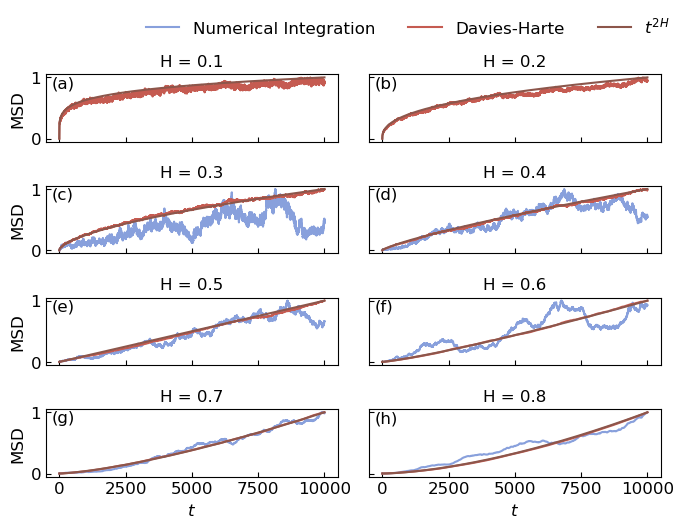

In [2]:
fig, ax = plt.subplots(int(len(h_s)/2), 2, sharex = True, sharey = True, figsize = (7,5))
col = 0
row = 0
panels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
for i, h in enumerate(h_s):
    df_dh = ut.read_hdf5_data(data_path + f"fBm_dh-h-{h}-1000.hdf5").set_index("t")
    df_in = ut.read_hdf5_all(h, data_path, 1, 10).set_index("t")
    msd_dh = fbms.msd(df_dh)
    msd_in = fbms.msd(df_in)
    
    t = df_in.index
    msd_anal = t**(2*h)
    msd_anal = msd_anal/max(msd_anal)
    
    axi = ax[row][col]
    
    if row != 0:
        axi.plot(t,msd_in, label = "Numerical Integration", color = colors[0])
    axi.plot(t,msd_dh, label = "Davies-Harte", color = colors[3])
    axi.plot(t,msd_anal, label = r"$t^{2H}$", color = colors[5])
    axi.set_title(f"H = {h}")
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)
    
    if row == len(h_s)/2 - 1: axi.set_xlabel("$t$")

    if col == 1: row += 1; col = 0
    else: col += 1; axi.set_ylabel("MSD")
    
    pu.add_caption_letter(axi, panels[i])


fig.tight_layout()
handles, labels = ax[1][1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.07), ncol = len(h_s)/2)
fig.savefig("../outs/fBm.png")
